# Diamonds Price Prediction 

#### Steps involved in Data Preprocessing

###### 1. Importing libraries
###### 2. Loading the dataset
###### 3. Finding Missing Data
###### 4. Data Visualization
###### 5. Identifying and removing outliers
###### 6. Encoding Categorical Data
###### 7. Model Building


 #### 1) Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# Modelling Algorithms :



# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


# Modelling Helpers :
from sklearn.preprocessing import Normalizer , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score


#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import r2_score

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 


# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


#### 2) Loading Data

In [2]:
diamonds = pd.read_csv('diamonds.csv')
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


#### 2.1) Features Description

    Carat : Carat weight of the Diamond.
    Cut : Describe cut quality of the diamond.

            Quality in increasing order Fair, Good, Very Good, Premium, Ideal .

    Color : Color of the Diamond.

            With D being the best and J the worst.

    Clarity : Diamond Clarity refers to the absence of the Inclusions and Blemishes.

            (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

    Depth : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.
    Table : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
    Price : the Price of the Diamond.
    X : Length of the Diamond in mm.
    Y : Width of the Diamond in mm.
    Z : Height of the Diamond in mm.

Qualitative Features (Categorical) : Cut, Color, Clarity.

Quantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z.
Price is the Target Variable.

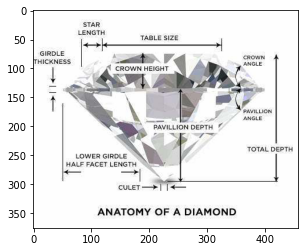

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(r'C:\Users\Reyad\Desktop\diamonds.jpg')

plt.imshow(img)
plt.show()

#### 2.2)  Drop the 'Unnamed: 0' column as we already have Index

In [4]:
diamonds.drop(['Unnamed: 0'] , axis=1 , inplace=True)

In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### 3) Finding Missing Data

In [7]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### 4) Data Visualization

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

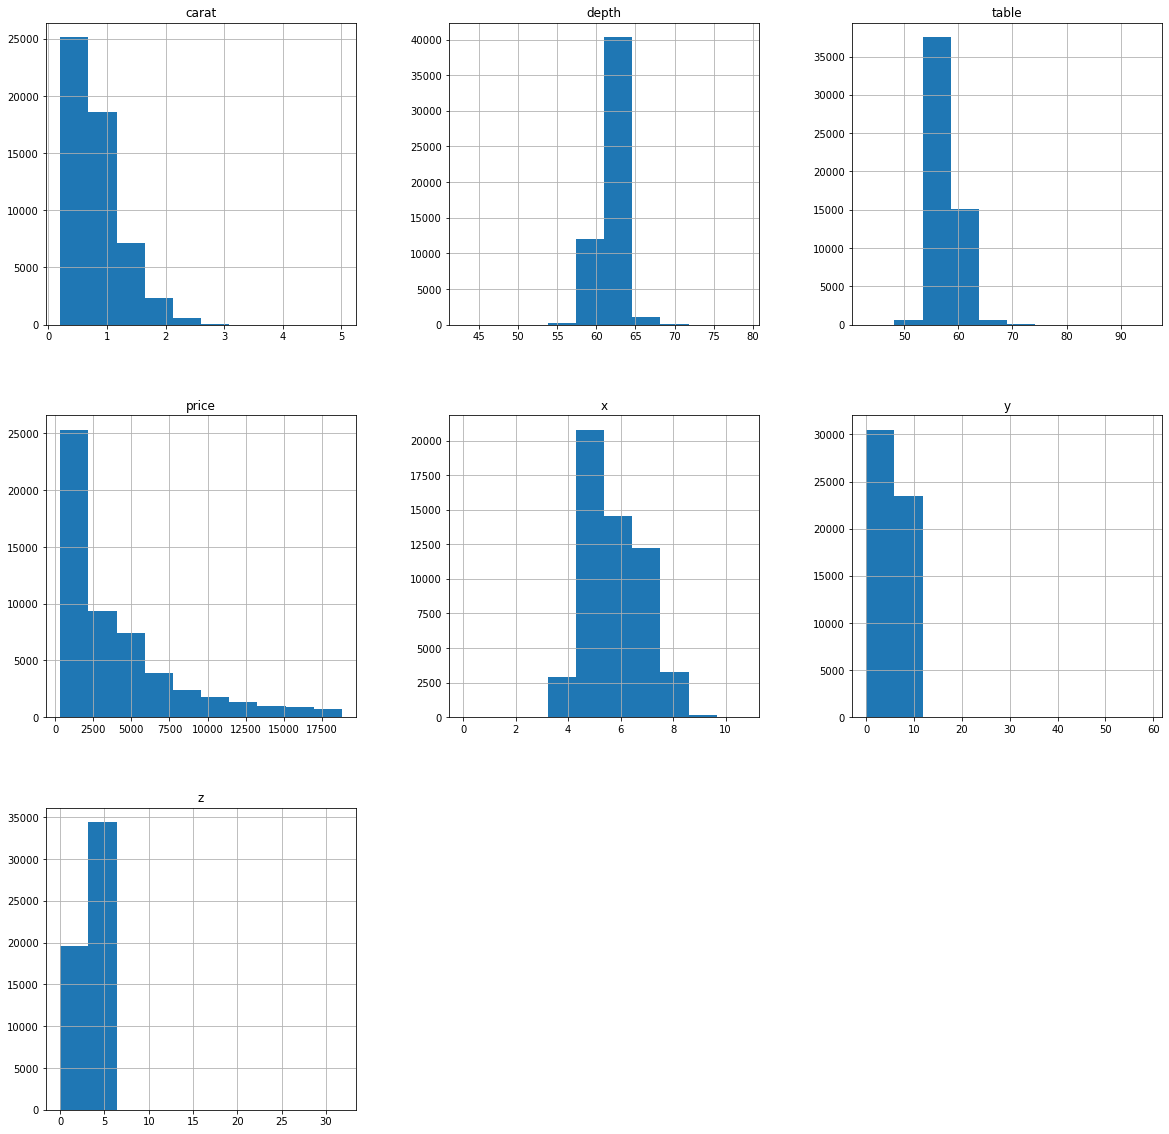

In [8]:
diamonds.hist(figsize=(20,20))

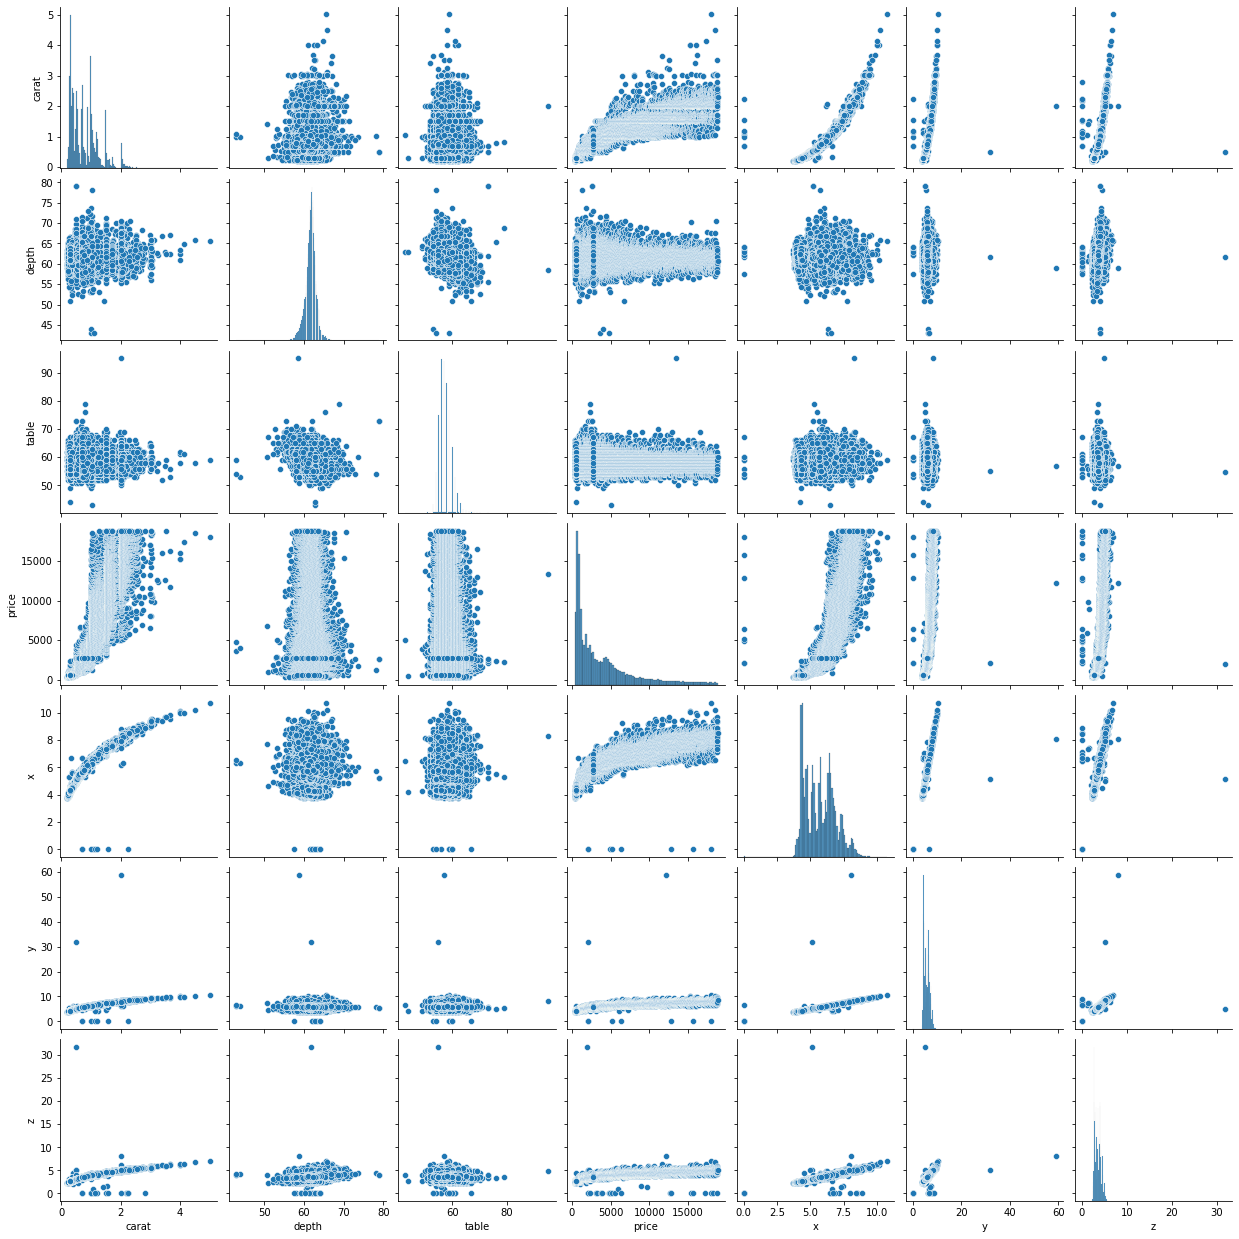

In [9]:
sns.pairplot(diamonds)

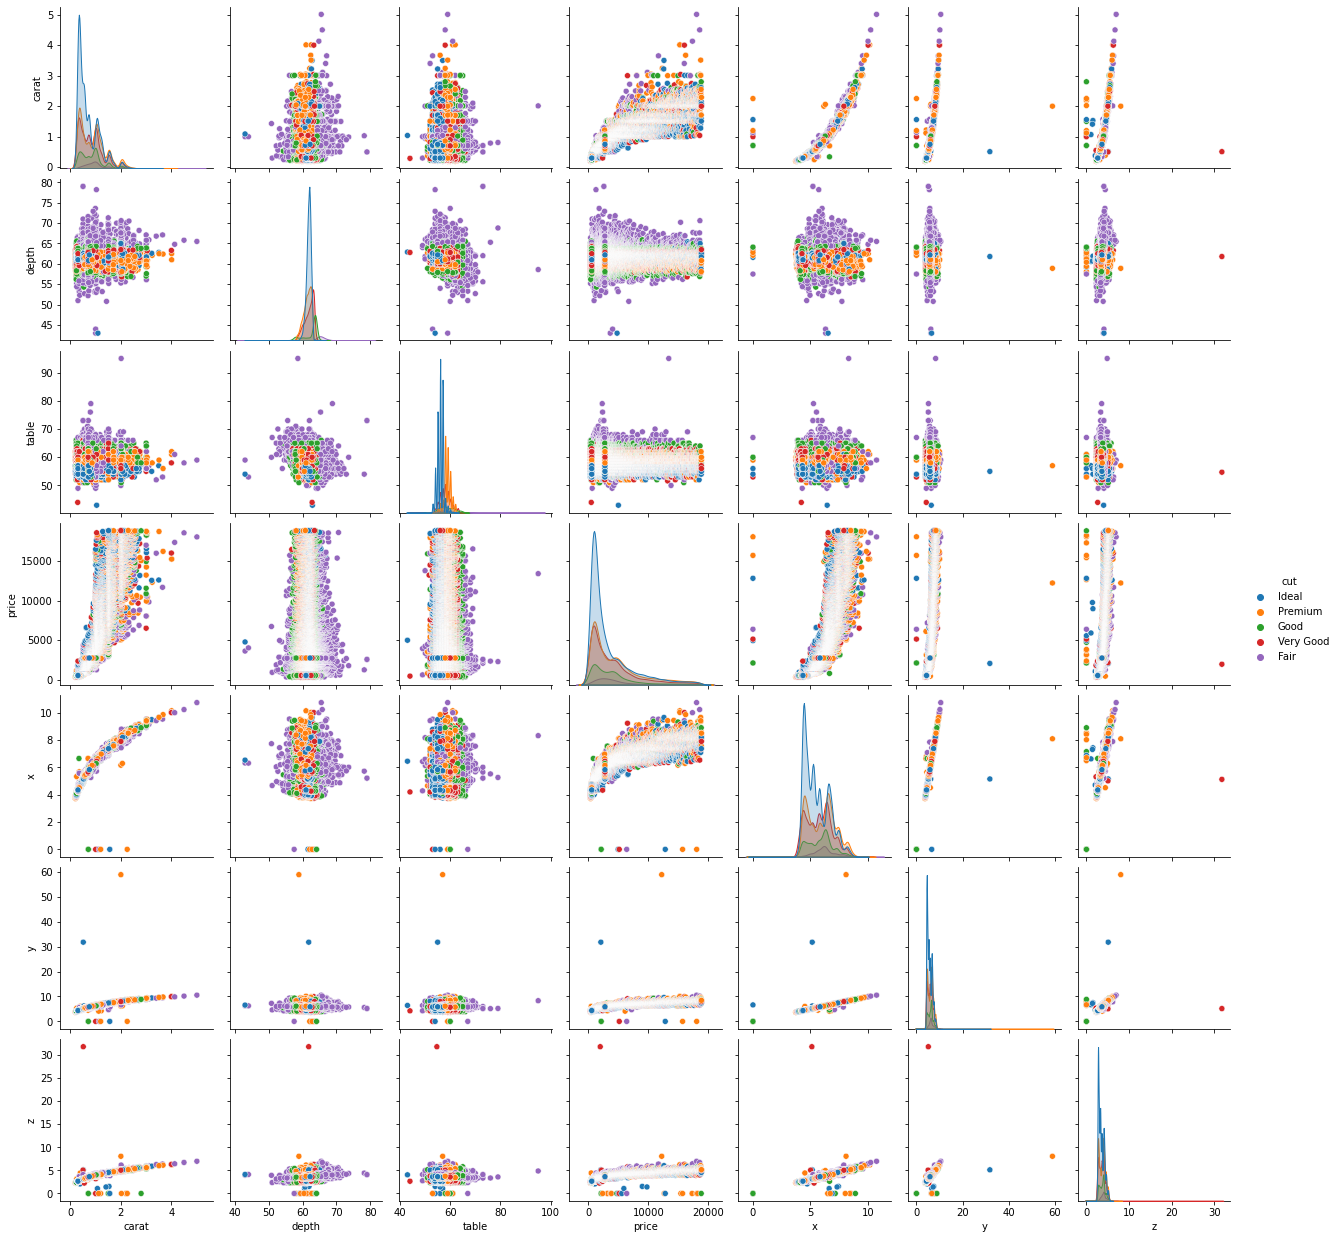

In [10]:
ax=sns.pairplot(diamonds, hue= "cut")

C:\Users\Reyad\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


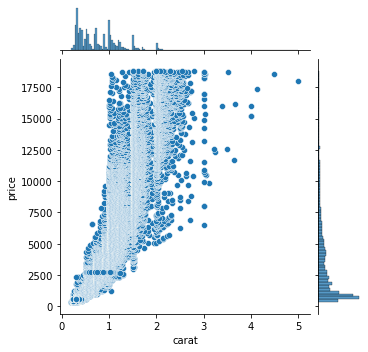

In [11]:
sns.jointplot(x='carat' , y='price' , data=diamonds , size=5)

C:\Users\Reyad\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


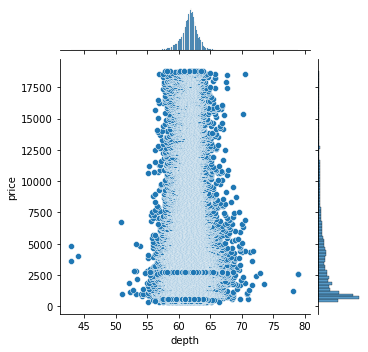

In [12]:
sns.jointplot(x='depth' , y='price' , data=diamonds , size=5)

In [13]:
diamonds['depth'].skew()

-0.08229402630189467

In [14]:
diamonds['depth'].std()
diamonds['depth'].mean()

61.74940489432624

C:\Users\Reyad\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


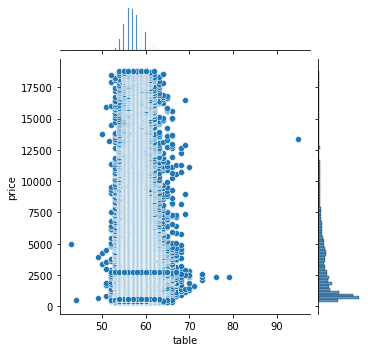

In [15]:
sns.jointplot(x='table' , y='price' , data=diamonds , size=5)

C:\Users\Reyad\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


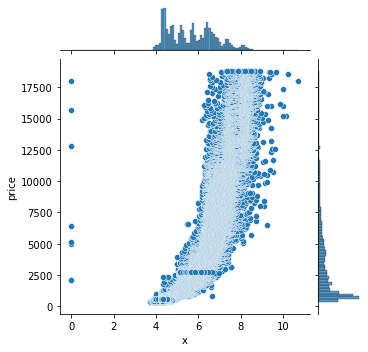

In [16]:
sns.jointplot(x='x' , y='price' , data=diamonds , size=5)

C:\Users\Reyad\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


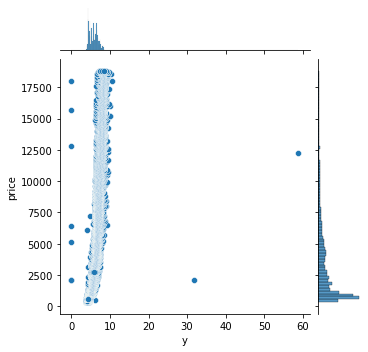

In [17]:
sns.jointplot(x='y' , y='price' , data=diamonds , size=5)

C:\Users\Reyad\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


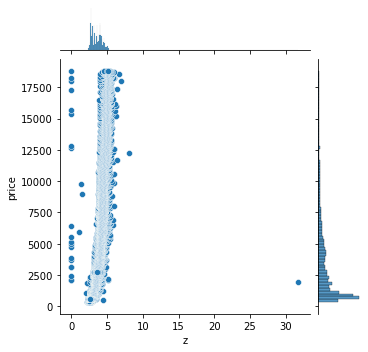

In [18]:
sns.jointplot(x='z' , y='price' , data=diamonds , size=5)

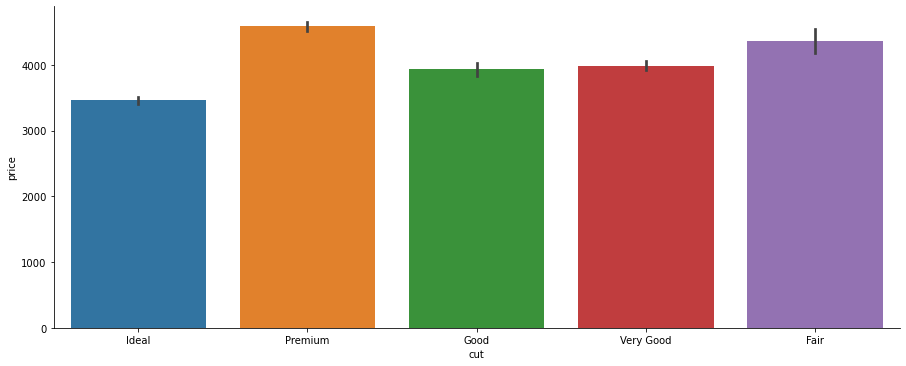

In [19]:
sns.catplot(x='cut',y='price' ,data=diamonds ,kind='bar', aspect=2.5 )

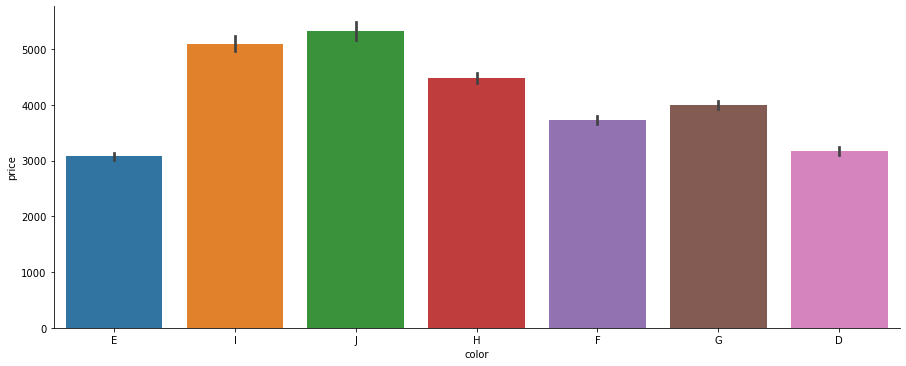

In [20]:
sns.catplot(x='color',y='price' ,data=diamonds ,kind='bar',legend =True, aspect=2.5 )

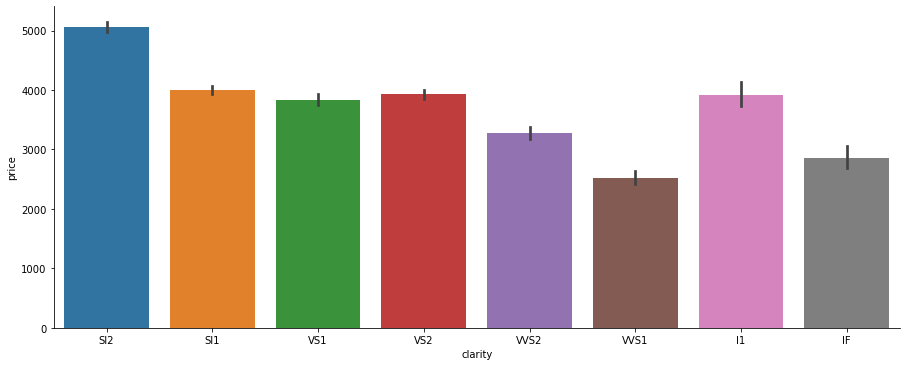

In [21]:
sns.catplot(x='clarity',y='price' ,data=diamonds ,kind='bar',legend=True, aspect=2.5 )

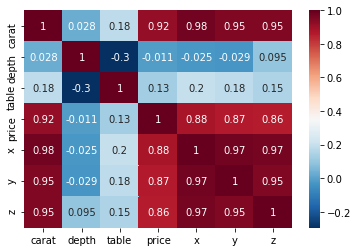

In [22]:
sns.heatmap(diamonds.corr(), annot=True, cmap='RdBu_r')
plt.show()

#### 5. Identifying and removing outliers

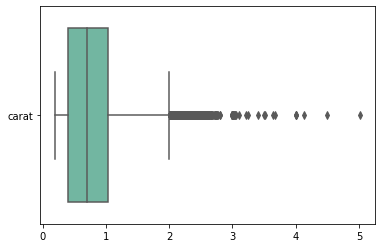

In [23]:
sns.boxplot(data=diamonds[['carat']], orient="h", palette="Set2")
plt.show()

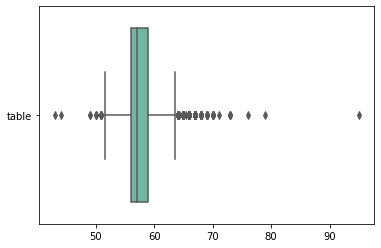

In [24]:
sns.boxplot(data=diamonds[['table']], orient="h", palette="Set2")
plt.show()

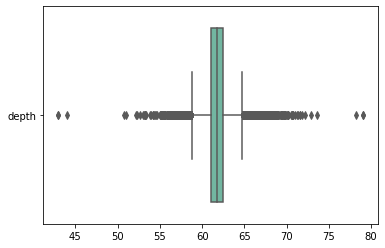

In [25]:
sns.boxplot(data=diamonds[['depth']], orient="h", palette="Set2")
plt.show()

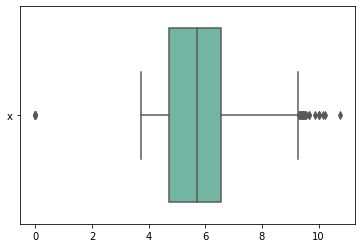

In [26]:
sns.boxplot(data=diamonds[['x']], orient="h", palette="Set2")
plt.show()

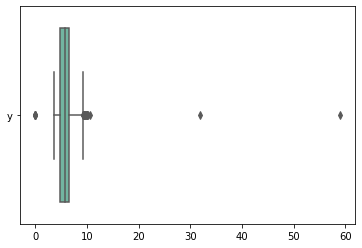

In [27]:
sns.boxplot(data=diamonds[['y']], orient="h", palette="Set2")
plt.show()

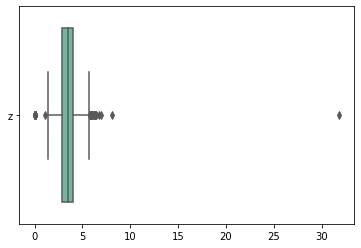

In [28]:
sns.boxplot(data=diamonds[['z']], orient="h", palette="Set2")
plt.show()

In [29]:
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0



#### Points to notice:

Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points

In [30]:
len(diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)])

20

In [31]:
diamonds.shape

(53940, 10)

In [32]:
# Make copy to avoid changing original data
diamonds_data = diamonds.copy()

In [33]:
diamonds_data=diamonds_data[(diamonds_data[["x","y","z"]]!=0).all(axis=1)]

In [34]:
diamonds_data.shape

(53920, 10)

In [35]:
diamonds_data['volume'] = diamonds_data['x']*diamonds_data['y']*diamonds_data['z']

In [36]:
diamonds_data.drop(['x','y','z'], axis=1, inplace= True)
diamonds_data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


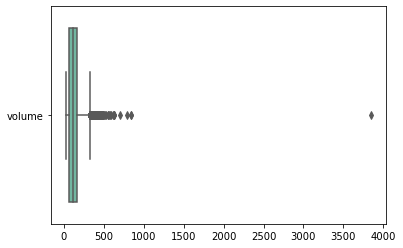

In [37]:
sns.boxplot(data=diamonds_data[['volume']],orient="h", palette="Set2")
plt.show()

In [38]:
diamonds['depth'].skew()

-0.08229402630189467

In [39]:
diamonds_data.describe()

,carat,depth,table,price,volume
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,129.897567
std,0.473795,1.432331,2.234064,3987.280446,78.219789
min,0.200000,43.000000,43.000000,326.000000,31.707984
25%,0.400000,61.000000,56.000000,949.000000,65.189759
50%,0.700000,61.800000,57.000000,2401.000000,114.840180
75%,1.040000,62.500000,59.000000,5323.250000,170.846415
max,5.010000,79.000000,95.000000,18823.000000,3840.598060


In [40]:
diamonds_data.corr()

,carat,depth,table,price,volume
carat,1.000000,0.028259,0.181646,0.921592,0.978280
depth,0.028259,1.000000,-0.295733,-0.010729,0.009039
table,0.181646,-0.295733,1.000000,0.127245,0.167809
price,0.921592,-0.010729,0.127245,1.000000,0.904255
volume,0.978280,0.009039,0.167809,0.904255,1.000000


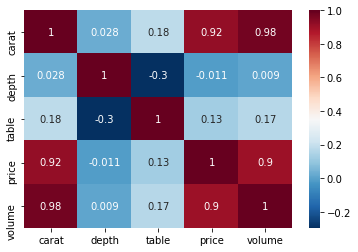

In [41]:
sns.heatmap(diamonds_data.corr(), annot=True, cmap='RdBu_r')
plt.show()

In [42]:
object_cols = [col for col in diamonds_data.columns if diamonds_data[col].dtype in ['object']]
object_cols

['cut', 'color', 'clarity']

In [43]:
# Get list of categorical variables
#obj = (diamonds_data.dtypes =="object")
#object_cols = list(obj[obj].index)
#print("Categorical variables:")
#print(object_cols)

In [44]:
numerical_cols = [cname for cname in diamonds_data.columns if diamonds_data[cname].dtype in ['int64', 'float64']]
numerical_cols

['carat', 'depth', 'table', 'price', 'volume']

In [45]:
#diamonds_data.boxplot(numerical_cols)

In [46]:
diamonds_data[diamonds_data['table'].isnull()]

,carat,cut,color,clarity,depth,table,price,volume


In [47]:
numerical_cols.remove('price')

In [48]:
numerical_cols

['carat', 'depth', 'table', 'volume']

In [49]:
Q1 = diamonds_data[numerical_cols].quantile(0.25)
Q3 = diamonds_data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

carat       0.640000
depth       1.500000
table       3.000000
volume    105.656656
dtype: float64


In [50]:
#print(diamonds_data[numerical_cols] < (Q1 - 1.5 * IQR)) |(diamonds_data[numerical_cols] > (Q3 + 1.5 * IQR))

In [51]:
diamonds_data = diamonds_data[~((diamonds_data[numerical_cols] < (Q1 - 1.5 * IQR)) |(diamonds_data[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [52]:
diamonds_data.shape

(49286, 8)

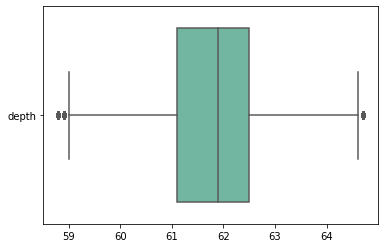

In [53]:
sns.boxplot(data=diamonds_data[['depth']], orient="h", palette="Set2")
plt.show()

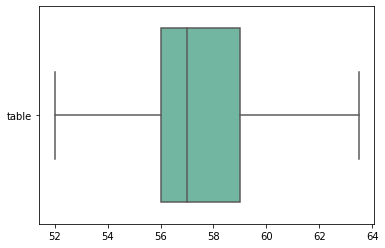

In [54]:
sns.boxplot(data=diamonds_data[['table']], orient="h", palette="Set2")
plt.show()

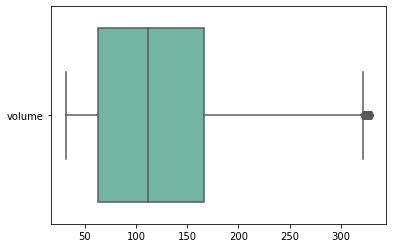

In [55]:
sns.boxplot(data=diamonds_data[['volume']], orient="h", palette="Set2")
plt.show()

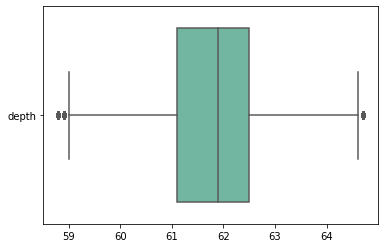

In [56]:
sns.boxplot(data=diamonds_data[['depth']], orient="h", palette="Set2")
plt.show()

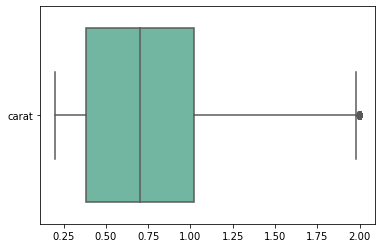

In [57]:
sns.boxplot(data=diamonds_data[['carat']], orient="h", palette="Set2")
plt.show()

In [58]:
diamonds_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
volume     0
dtype: int64

#### 6) Encoding Categorical Data

In [59]:
label_encoder = LabelEncoder()
for col in object_cols:
    diamonds_data[col] = label_encoder.fit_transform(diamonds_data[col])
diamonds_data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250
5,0.24,4,6,7,62.8,57.0,336,38.693952


In [60]:
diamonds_data.describe()

,carat,cut,color,clarity,depth,table,price,volume
count,49286.000000,49286.000000,49286.000000,49286.000000,49286.000000,49286.000000,49286.000000,49286.000000
mean,0.739739,2.627420,2.531043,3.897212,61.784332,57.270004,3509.858317,120.528426
std,0.400539,0.944963,1.676143,1.730330,1.106507,2.019195,3424.286062,64.704923
min,0.200000,0.000000,0.000000,0.000000,58.800000,52.000000,326.000000,31.707984
25%,0.380000,2.000000,1.000000,2.000000,61.100000,56.000000,907.000000,63.041550
50%,0.700000,2.000000,3.000000,4.000000,61.900000,57.000000,2213.500000,111.175680
75%,1.020000,3.000000,4.000000,5.000000,62.500000,59.000000,4961.000000,166.345891
max,2.000000,4.000000,6.000000,7.000000,64.700000,63.500000,18818.000000,329.178412


#### 7) Model Building

Steps involved in Model Building

    Setting up features and target
    Build a pipeline of standard scalar and model for Three different regressors.
    Fit all the models on training data
    Get mean of cross-validation on the training set for all the models for mean_absolute_error
    Pick the model with the best cross-validation score
    


In [61]:
X= diamonds_data.drop(["price"],axis =1)
y= diamonds_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=0)

In [62]:
diamonds_data

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250
5,0.24,4,6,7,62.8,57.0,336,38.693952
...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,115.920000
53936,0.72,1,0,2,63.1,55.0,2757,118.110175
53937,0.70,4,0,2,62.8,60.0,2757,114.449728
53938,0.86,3,4,3,61.0,58.0,2757,140.766120


In [63]:

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

In [64]:
pipeline_lnr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_Regression",LinearRegression())])

pipeline_dtr=Pipeline([("scalar2",StandardScaler()),
                     ("dt_Regression",DecisionTreeRegressor())])

pipeline_rfr=Pipeline([("scalar3",StandardScaler()),
                     ("rf_Regression",RandomForestRegressor())])



In [65]:
pipelines = [pipeline_lnr, pipeline_dtr, pipeline_rfr]

In [68]:
results_mae = []
results_mse = []
results_cvs =[]
results_R2=[]
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    score1 = mean_absolute_error(y_test, preds)
    score2=mean_squared_error(y_test,preds)
    # Multiply by -1 since sklearn calculates *negative* MAE
    scores3 =  -1* cross_val_score(pipe, X, y,cv=5)
    scores4=r2_score(y_test,preds)
    results_cvs.append(scores3)
    results_mae.append(score1)
    results_mse.append(score2)
    results_R2.append(scores4)
# Evaluate the model
#print(pipelines[pipe])
                                   


In [71]:

print('MAE:Liner Regression',results_mae[0] , ' \n MAE:Decision Tree Regression',results_mae[1],  '\n MAE:Random Forest',results_mae[2])
print('MSE:,Liner Regression',results_mse[0] , ' \n MAE:Decision Tree Regression',results_mse[1],  ' \n MAE:Random Forest',results_mse[2])
print('CVS:Liner Regression',results_cvs[0] , ' \n CSV:Decision Tree Regression',results_cvs[1], '\n MAE:Random Forest',results_cvs[2])
print('R2:Liner Regression',results_R2[0] ,' \n R2:Decision Tree Regression',results_R2[1] ,'\n R2:Random Forest',results_R2[2])

MAE:Liner Regression 875.7802879143077  
 MAE:Decision Tree Regression 308.95151146277135 
 MAE:Random Forest 240.29705565527607
MSE:,Liner Regression 1638363.768644716  
 MAE:Decision Tree Regression 359356.58437591576  
 MAE:Random Forest 205799.60466347562
CVS:Liner Regression [ 0.26175581 -0.62147665 -0.76995852 13.52793824  1.15224636]  
 CSV:Decision Tree Regression [-0.3157477  -0.23919813 -0.76585679  0.93506442 -0.09308429] 
 MAE:Random Forest [-0.58260801 -0.54441479 -0.77581687  0.24985123 -0.31403232]
R2:Liner Regression 0.8633617304664677  
 R2:Decision Tree Regression 0.9700299391537303 
 R2:Random Forest 0.9828364723451106


In [72]:
RFR=RandomForestRegressor(bootstrap= True,max_depth=5,max_features='auto',
 min_samples_leaf= 1,
 min_samples_split=2,
 n_estimators= 85)
RFR.fit(X_train,y_train) 
y_preds=RFR.predict(X_test)

In [73]:
print("MAE : ",mean_absolute_error(y_test,y_preds))
print("MSE : ",mean_squared_error(y_test,y_preds))

MAE :  502.36348650555107
MSE :  784033.6288332903


In [74]:
RFR_score = cross_val_score(RFR, X_train, y_train, cv = 5)
print("mean cross validation score: {:.2f} %".format(np.mean(RFR_score)))
print("score without cv: {}".format(RFR.score(X_train, y_train)))

# on the test or hold-out set
print(r2_score(y_test, RFR.predict(X_test)))

mean cross validation score: 0.94 %
score without cv: 0.9384594180790939
0.9346122025217296


In [75]:
# Number of trees in random forest
n_estimator =[int(x) for x in np.linspace(start=100,stop=300,num=10,)]
print(n_estimator)# Number of features considered at every split
max_features=['auto','sqrt']
# Maximum number of level in tree
max_depth=[5,10]
# Minimum number of samples required to split anode
min_samples_split=[2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf=[1,2]
# Method of selecting samples for training each tree
bootstrap=[True,False]

[100, 122, 144, 166, 188, 211, 233, 255, 277, 300]


In [ ]:
#Create the param. grid
param_grid={'n_estimators':n_estimator,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap
                               }
print(param_grid)

In [ ]:
RFR=RandomForestRegressor()

In [ ]:
RFCgridsearch=GridSearchCV(estimator=RFR,param_grid=param_grid,cv=5,verbose=2,n_jobs=4)
RFCgridsearch.fit(X_train,y_train)

In [ ]:
RFCgridsearch.best_score_

In [ ]:
RFCgridsearch.best_params_

In [ ]:
RFCgridsearch.best_estimator_

In [ ]:
print("r2_score : ",r2_score(y_test,RFCgridsearch.best_estimator_.predict(X_test)))

In [ ]:
print("\n MAE : ",mean_absolute_error(y_test,RFCgridsearch.best_estimator_.predict(X_test)))

In [ ]:
print("\n MSE : ",mean_squared_error(y_test,RFCgridsearch.best_estimator_.predict(X_test)))

In [ ]:
print("\n Accuracy_score for Predictions : ",Accuracy_score(y_test,RFCgridsearch.best_estimator_.predict(X_test)))

In [ ]:
print("\n Accuracy_score for Training : ",Accuracy_score(y_train,RFCgridsearch.best_estimator_.predict(X_train)))

In [ ]:
print("\n Accuracy_score for Training : ",Accuracy_score(y_train,X_train))